## 3.3 Preprocessing and Scaling

In [1]:
!pip install mglearn

     |████████████████████████████████| 540 kB 5.1 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=41be5a1cf6b1e1c9e89759dabb660d82fbf64fcd43e0e3eebdcbaf146282c6f3
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import sklearn

from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import NMF
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

%matplotlib inline
plt.rcParams['image.cmap'] = "gray"

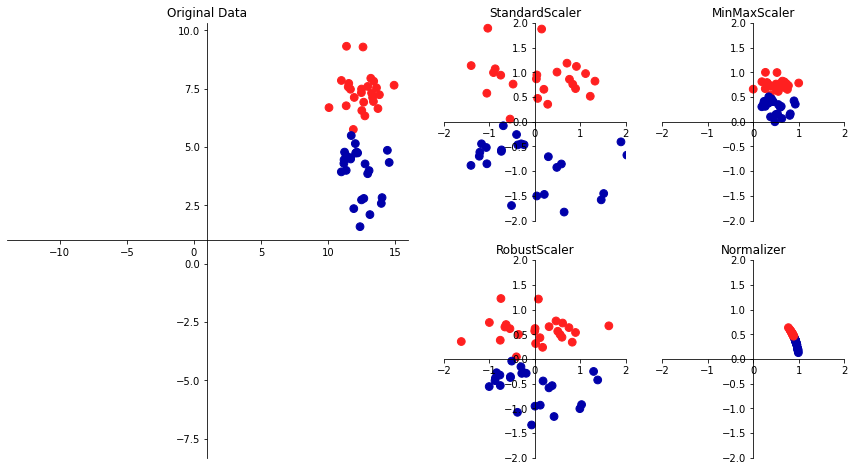

In [3]:
mglearn.plots.plot_scaling()

*Different ways to rescale and preprocess a dataset*

### 3.3.2 Applying Data Transformations

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [6]:
# transform data
X_train_scaled = scaler.transform(X_train)

# print dataset properties before and after scaling
print('transformed shape: {}'.format(X_train_scaled.shape))
print('per-feature minimum before scaling:\n{}'.format(X_train.min(axis=0)))
print('per-feature maximum before scaling:\n{}'.format(X_train.max(axis=0)))
print('per-feature minimum after scaling:\n{}'.format(X_train_scaled.min(axis=0)))
print('per-feature maximum after scaling:\n{}'.format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling:
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
# transform test set
X_test_scaled = scaler.transform(X_test)

# print test data properties after scaling
print('per-feature minimum after scaling:\n{}'.format(X_test_scaled.min(axis=0)))
print('per-feature maximum after scaling:\n{}'.format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


### 3.3.3 Scaling Training and Test Data the Same Way

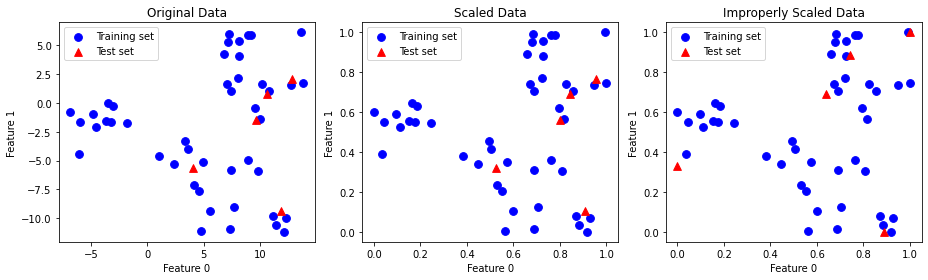

In [8]:
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c='blue', label='Training set', s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c='red', label='Test set', s=60)
axes[0].legend(loc='upper left')
axes[0].set_title('Original Data')

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
 
# visualise the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='blue', label='Training set', s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c='red', label='Test set', s=60)
axes[1].legend(loc='upper left')
axes[1].set_title('Scaled Data')

# rescale the test set separately so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualise wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='blue', label='Training set', s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c='red', label='Test set', s=60)
axes[2].legend(loc='upper left')
axes[2].set_title('Improperly Scaled Data')

for ax in axes:
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')

fig.tight_layout();

*Effect of scaling training test data shown on the left together (center) and separately (right)*

**Shortcut and Efficient Alternative**

In [9]:
scaler = StandardScaler()

# calling fit and transform in a sequence (using method chaining)
X_scaled = scaler.fit(X_train).transform(X_train)

# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X_train)

### 3.3.4 The Effect of Preprocessing on Supervised Learning

In [10]:
X_train, X_test, y_train, y_test = train_test_split(cancer['data'], cancer['target'], random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print('Test set accuracy: {:.2f}'.format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


In [11]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training set
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print('Scaled test set accuracy: {:.2f}'.format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


In [12]:
# preprocessing using zero mean and unit variance scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training set
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print('Scaled test set accuracy: {:.2f}'.format(svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.96


## 3.4 Dimensionality Reduction, Feature Extraction, and Manifold Learning

### 3.4.1 Principal Component Analysis (PCA)

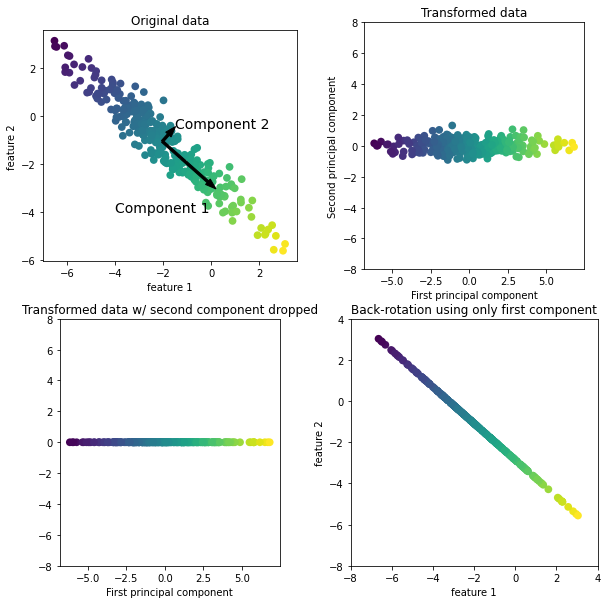

In [13]:
mglearn.plots.plot_pca_illustration()

*Transformation of data with PCA*

**Applying PCA to the cancer dataset for visualisation**

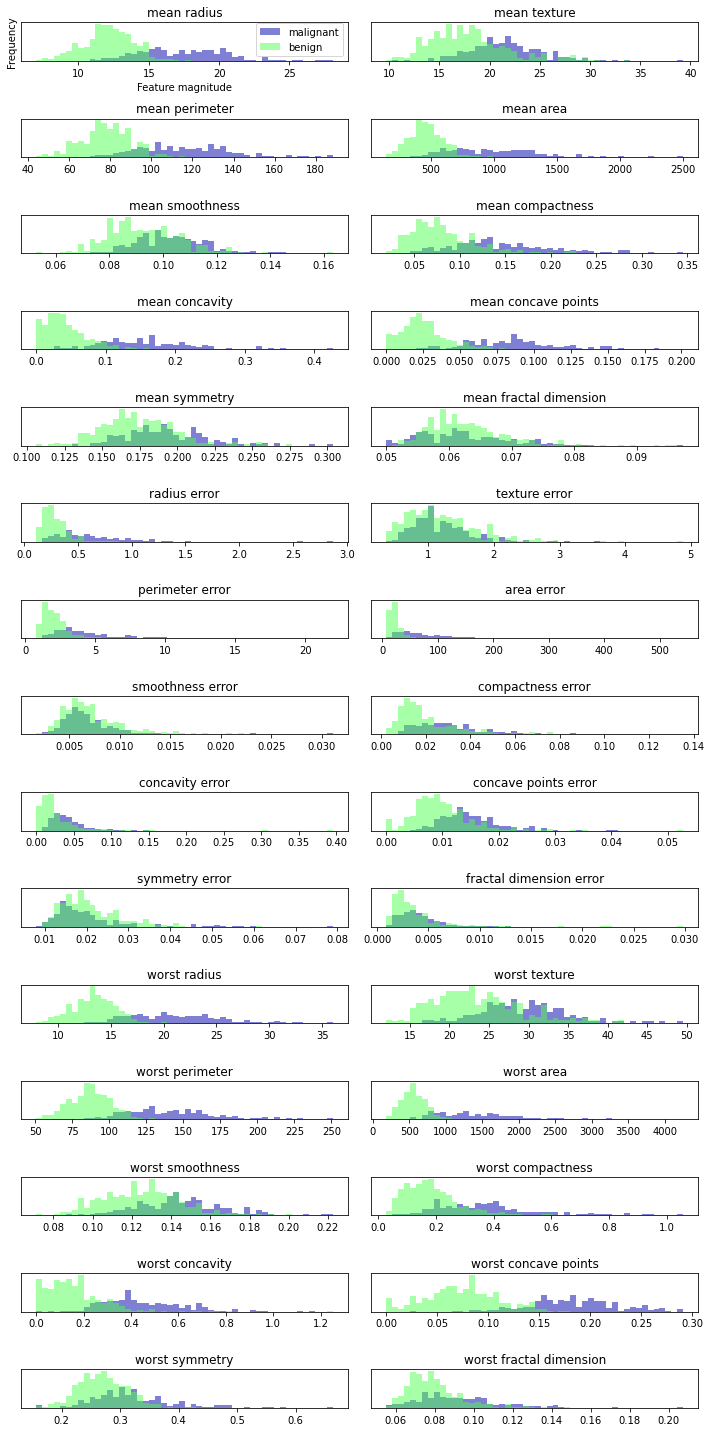

In [14]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
 
ax[0].set_xlabel('Feature magnitude')
ax[0].set_ylabel('Frequency')
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout();

*Per-class feature histograms on the Breast Cancer dataset*

In [15]:
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [16]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components=2)

# fit PCA model to breast cancer data
pca.fit(X_scaled)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print('original shape: {}'.format(str(X_scaled.shape)))
print('reduced shape: {}'.format(str(X_pca.shape)))

original shape: (569, 30)
reduced shape: (569, 2)


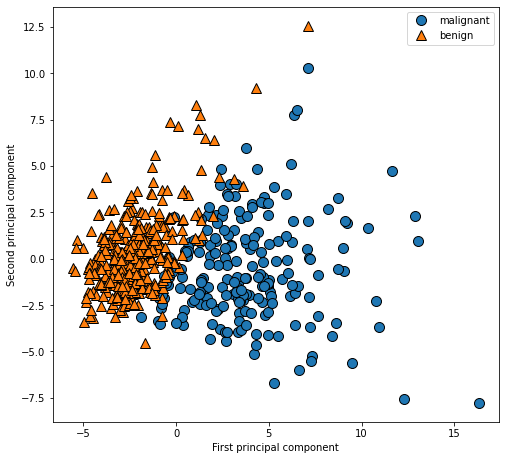

In [17]:
# plot first vs. second principal component, coloured by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Second principal component');

*Two-dimensional scatter plot of the Breast Cancer dataset using the first two principal components*

In [18]:
print('PCA component shape: {}'.format(pca.components_.shape))

PCA component shape: (2, 30)


In [19]:
print('PCA components:\n{}'.format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


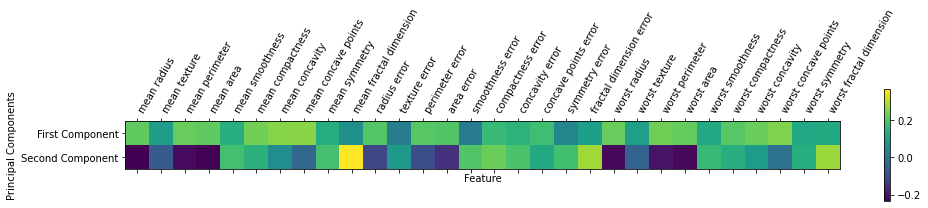

In [20]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['First Component', 'Second Component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal Components');

*Heat map of the first two principal components on the Breast Cancer dataset*

**Eigenfaces for feature extraction**

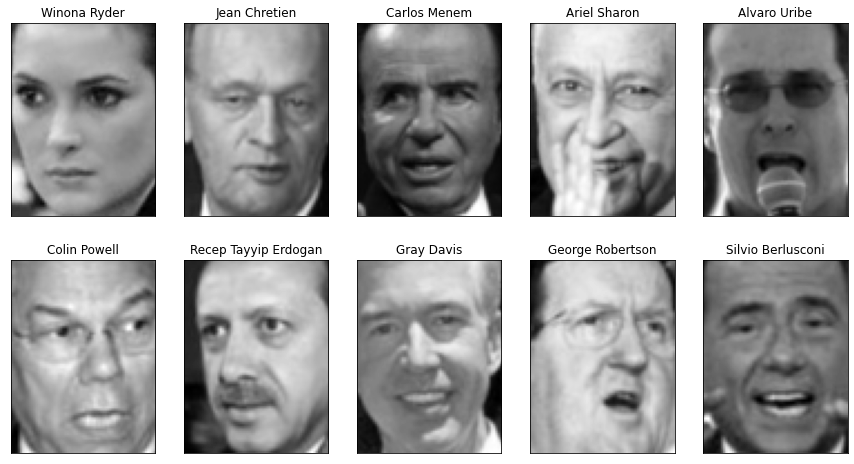

In [21]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

*Some images from the Labeled Faces in the Wild dataset*

In [22]:
print('people.images.shape: {}'.format(people.images.shape))
print('Number of classes: {}'.format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [23]:
# count how often each target appears
counts = np.bincount(people.target)

# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print('{0:25} {1:3}'.format(name, count), end='    ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               77    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Guillermo Coria            30    Hamid Karzai               22    Hans Blix                  39    
Hugo Chavez                71    Igor Ivanov                20    Jack Straw                 28    
Jacques Chirac             52    Jean Chretien              55    Jennifer Aniston           21    
Jennifer Capriati          42    Jennifer Lopez             21    Jeremy Greenstock          24    


In [24]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1 instead of 0 and 255 for better numeric stability
X_people /= 255

In [25]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

# build a KNeighborsClassifer
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print('Test set score of 1-nn: {:.2f}'.format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


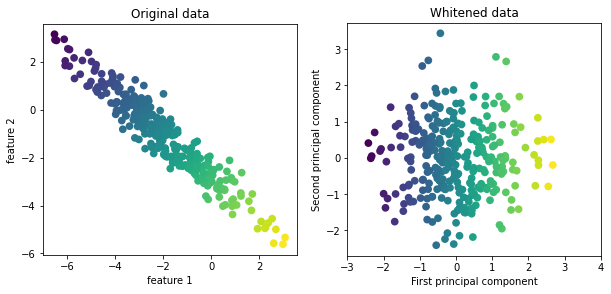

In [26]:
mglearn.plots.plot_pca_whitening()

*Transformation of data with PCA using whitening*

In [27]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca.shape: {}'.format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

print('Test set accuracy: {:.2f}'.format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


In [29]:
print('pca.components_.shape: {}'.format(pca.components_.shape))

pca.components_.shape: (100, 5655)


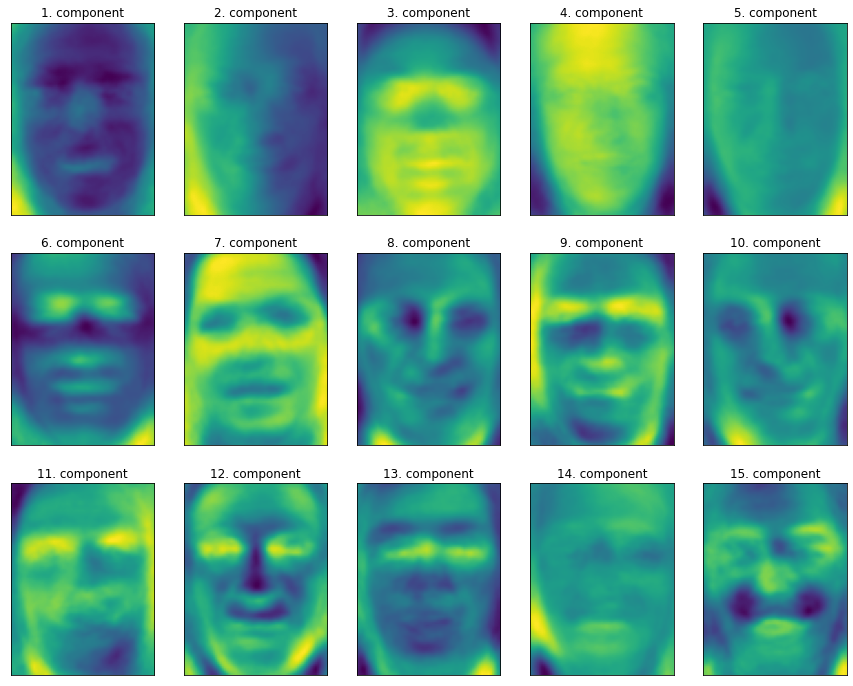

In [30]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title('{}. component'.format((i + 1)))

*Component vectors for the first 15 principal components of the faces dataset*

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 7.4s, 0.1min


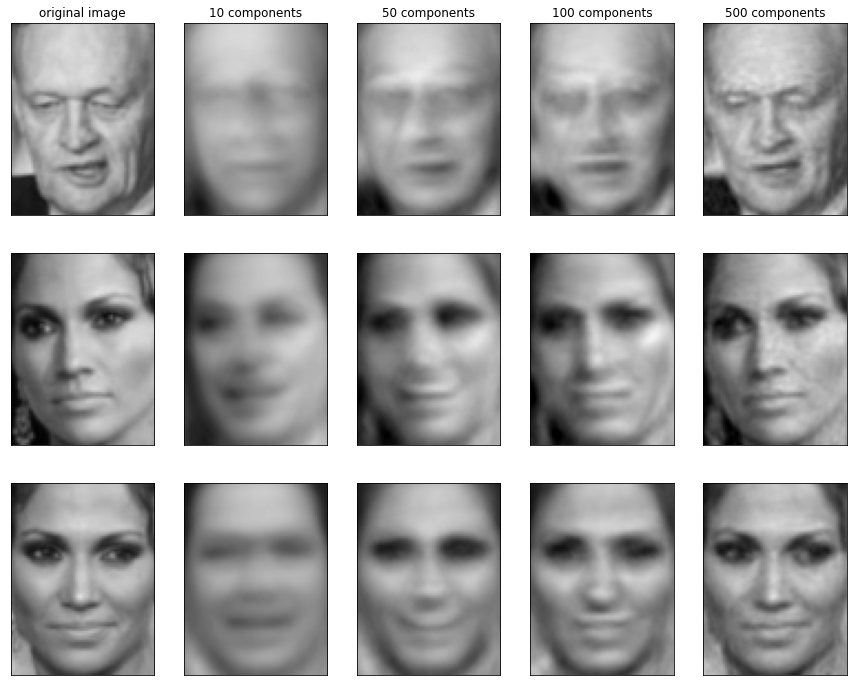

In [31]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape);

*Reconstructing three face images using increasing numbers of principal components*

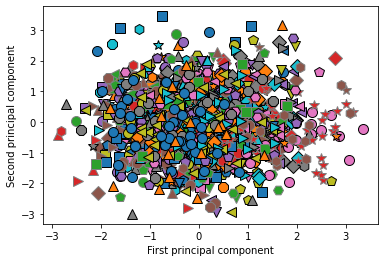

In [32]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel('First principal component')
plt.ylabel('Second principal component');

*Scatter plot of the faces dataset using the first two principal components*

### 3.4.2 Non-Negative Matrix Factorisation (NMF)

* Works similarly to PCA.
* Rather than wanting components which are orthogonal and that explain as much variance of the data as possible, we want the components and the coefficients to be non-negative.
* Overall, NMF leads to more interpretable components than PCA.


**Applying NMF to Synthetic Data**

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


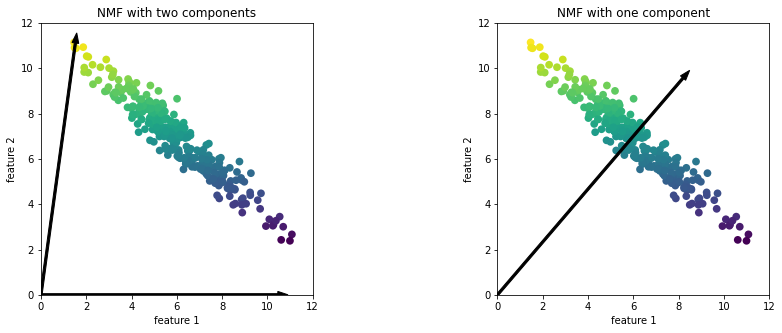

In [33]:
mglearn.plots.plot_nmf_illustration()

*Components found by non-negative matrix factorisation with two components (left) and one component (right)*

**Applying NMF to Face Images**

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: Fu

_____________________________________________________nmf_faces - 814.6s, 13.6min


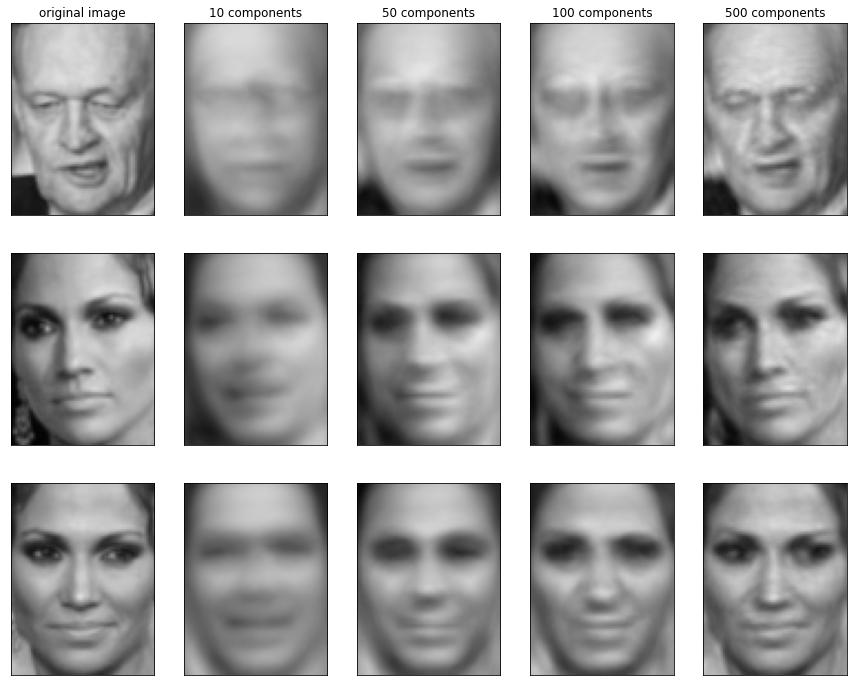

In [34]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

*Reconstructing three face images using increasing numbers of components found by NMF*

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


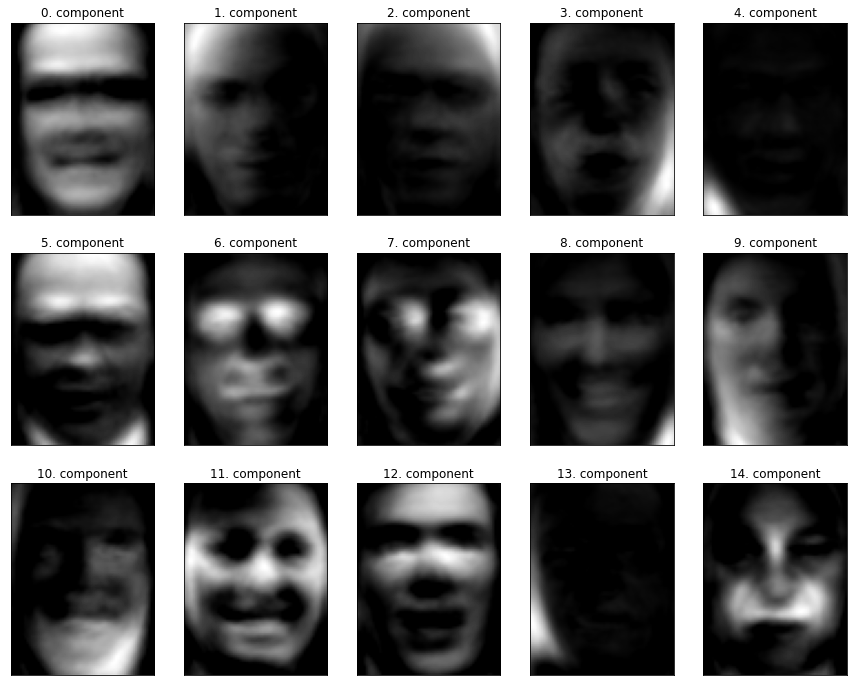

In [35]:
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('{}. component'.format(i))

*The components found by NMF on the faces dataset when using 15 components*

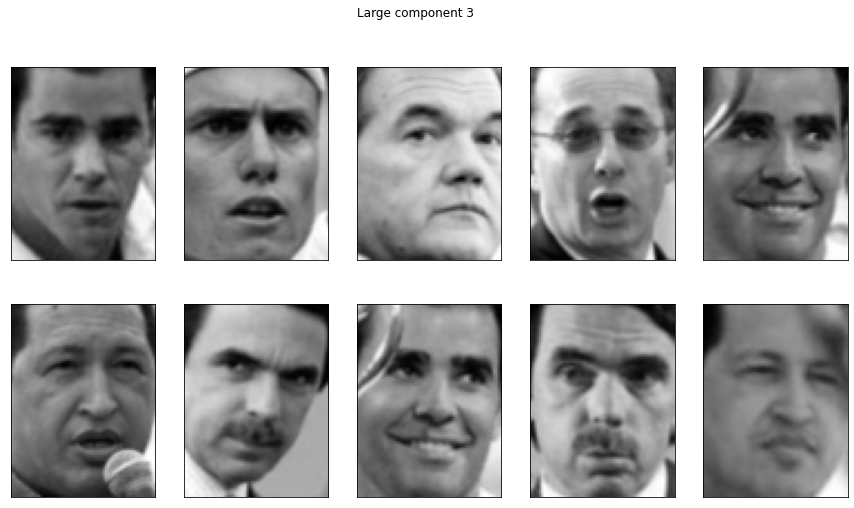

In [36]:
# sort by 3rd component, plot first 10 images
compn = 3
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle('Large component 3')
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

*Faces that have a large coefficient for component 3*

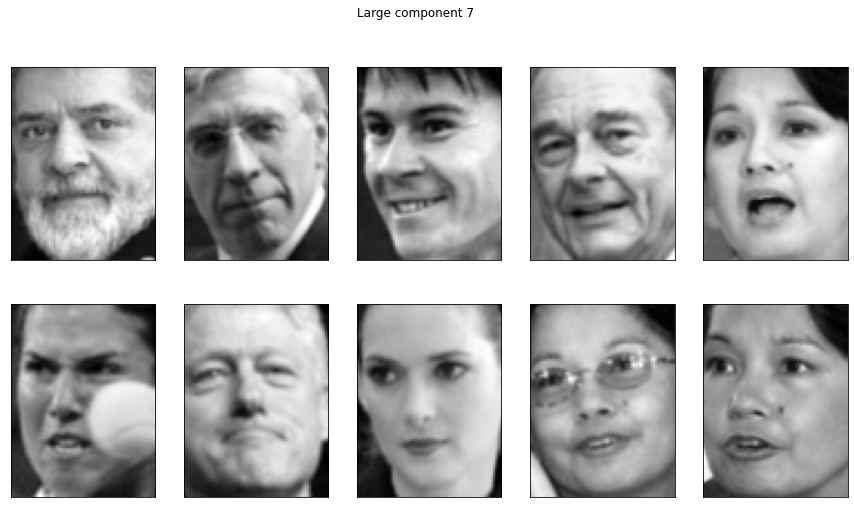

In [37]:
# sort by 7th component, plot first 10 images
compn = 7
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle('Large component 7')
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

*Faces that have a large coefficient for component 7*

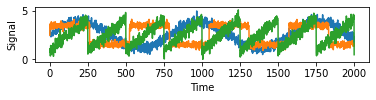

In [38]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel('Time')
plt.ylabel('Signal');

*Original signal sources*

In [39]:
# mix data into a 100-dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print('shape of measurements: {}'.format(X.shape))

shape of measurements: (2000, 100)


In [40]:
nmf = NMF(n_components=3, random_state=42, init='nndsvda')
S_ = nmf.fit_transform(X)
print('Recovered signal shape: {}'.format(S_.shape))

Recovered signal shape: (2000, 3)


In [41]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

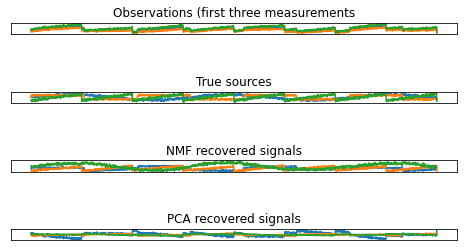

In [42]:
models = [X, S, S_, H]

names = ['Observations (first three measurements',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': 5},
                         subplot_kw={'xticks': (), 'yticks': ()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

*Recovering mixed sources using NMF and PCA* 

### 3.4.3 Manifold Learning with t-SNE

* The idea behind t-SNE is to find a two-dimensional representation of the data that preserves the distances between points as best as possible.
* Starts with a random two-dimensional representation for each data point, and then tries to make points that are close in the original feature space closer, and points that are far apart in the original feature space father apart.
* t-SNE puts more emphasis on points that are close by, rather than preserving distances between far-apart points.

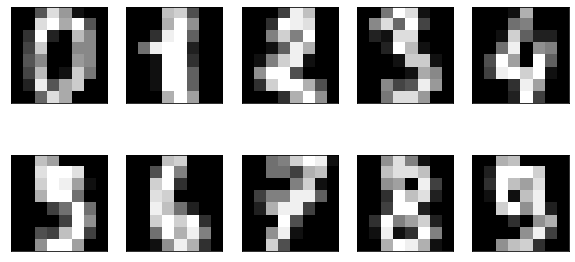

In [43]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks': (), 'yticks': ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

*Example images from the digits dataset*

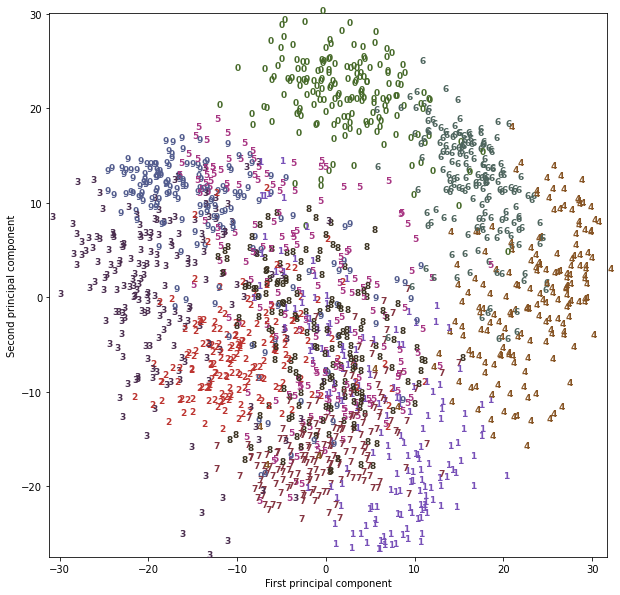

In [44]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)

# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})

plt.xlabel("First principal component")
plt.ylabel("Second principal component");

*Scatter plot of the digits dataset using the first two principal components*

In [45]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


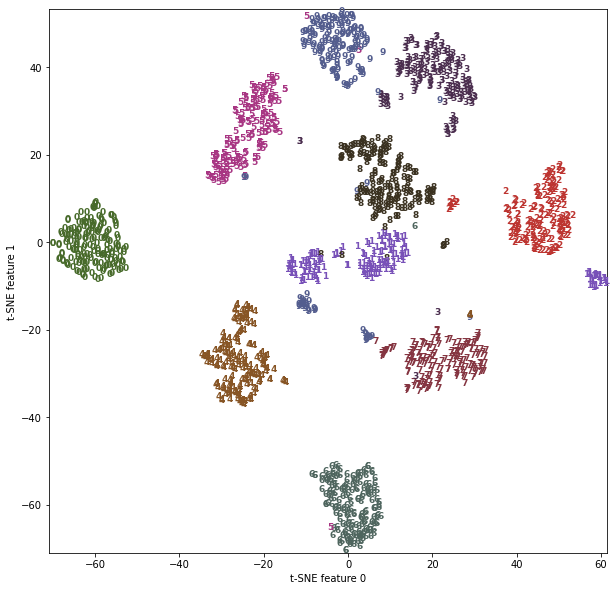

In [46]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
    
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1");

*Scatter plot of the digits dataset using two components found by t-SNE*

## 3.5 Clustering

### 3.5.1 K-Means Clustering

* Tries to find cluster centers that are representative of certain regions of the data.

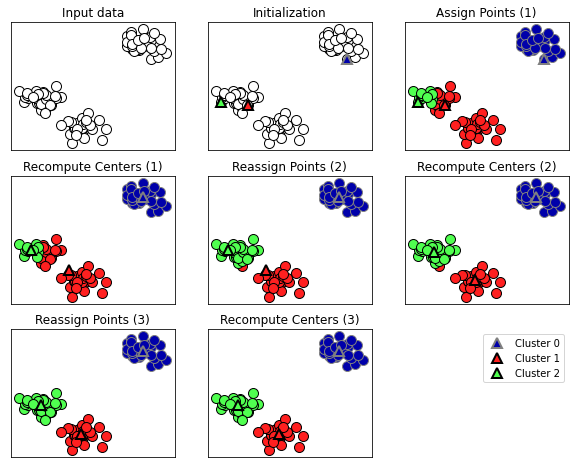

In [47]:
mglearn.plots.plot_kmeans_algorithm()

*Input data and three steps of the k-means algorithm*

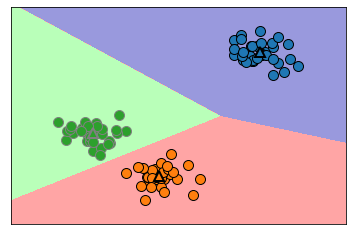

In [48]:
mglearn.plots.plot_kmeans_boundaries()

*Cluster centers and cluster boundaries found by the k-means algorithm*

In [49]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)

# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [50]:
print('Cluster memberships:\n{}'.format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [51]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


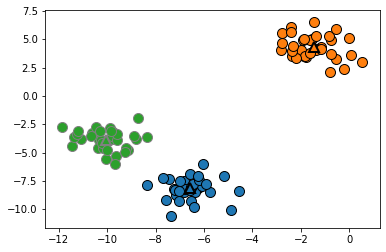

In [52]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2);

*Cluster assignments and cluster centers found by k-means with three clusters*

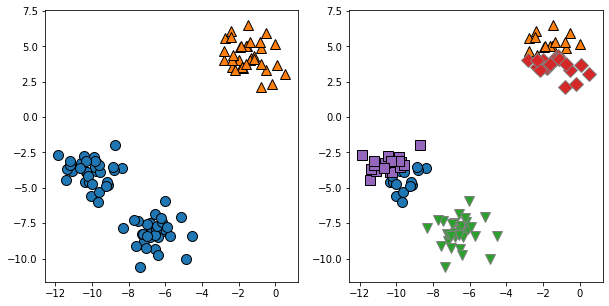

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# using two cluster centers
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0]);

# using five cluster centers
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1]);

*Cluster assignments found by k-means using two clusters (left) and five clusters (right)*

**Failure Cases of K-Means**

* K-Means can only capture relatively simple shapes.
* K-Means assumes that all clusters have the same diameter; it always draws the boundary between clusters to be exactly in the middle between the cluster centers.

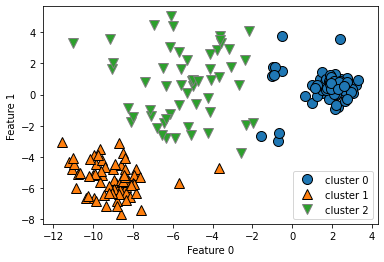

In [54]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)

y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc='best')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

*Cluster assignments found by K-Means when clusters have different densities*

* K-Means assumes that all directions are equally important for each cluster

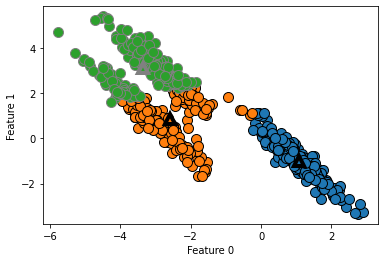

In [55]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# cluster the data into three classes
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
                         markers='^', markeredgewidth=4)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

*K-Means fails to identify nonspherical clusters*

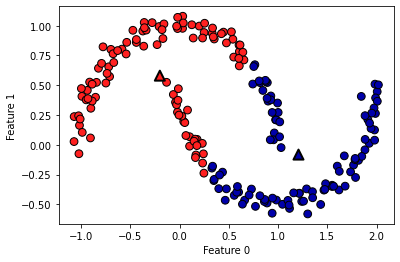

In [56]:
# generate synthetic make_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolor='k')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

K-Means fails to identify clusters with complex shapes

**Vector Quantisation, or Seeking K-Means as Decomposition**

* Thinking of K-Means as a decomposition method, where each point is represented using a single component, is called *vector quantisation*

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


Text(0, 0.5, 'nmf')

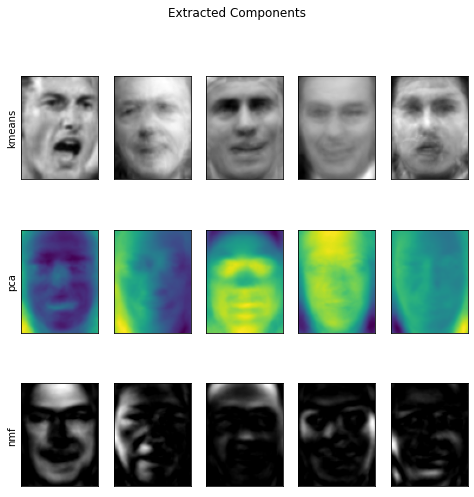

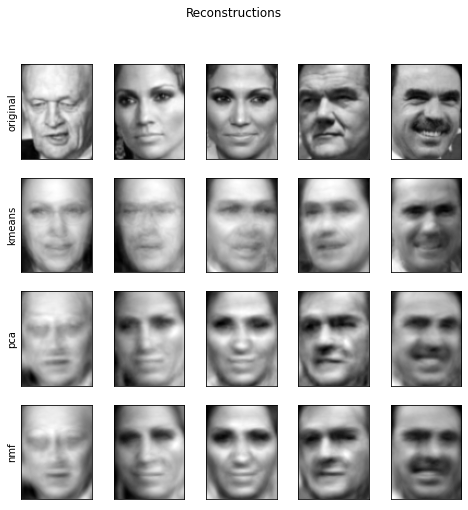

In [58]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")

for ax, comp_kmeans, comp_pca, comp_nmf in zip(
    axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
    axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
    X_reconstructed_nmf):

    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

*(Top) Comparing K-Means cluster centers to component found by PCA and NMF*

*(Bottom) Comparing image reconstructions using K-Means, PCA, and NMF with 100 components (or cluster centers) - K-Means uses only a single cluster center per image*

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


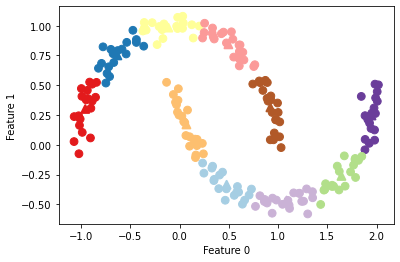

In [59]:
 X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

print('Cluster memberships:\n{}'.format(y_pred))

*Using many K-Means clusters to cover the variation in the complex dataset*

In [60]:
distance_features = kmeans.transform(X)
print('Distance feature shape: {}'.format(distance_features.shape))
print('Distance features:\n{}'.format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


**Advantages and Disadvantages:**

* **\+** Runs quick and scales easily to large datasets.
* **\+** Use `MiniBatchKMeans` for even larger datasets.
* **-** Relies on random initialisation, the outcomes relies on the random seed.
* **-** Restrictive assumptions made on the shape of clusters.
* **-** Must specify number of clusters.

### 3.5.2 Agglomerative Clustering

* A collection of clustering algorithms.
* The algorithm starts by declaring each point its own cluster, and then merges the two most similar clusters until some stopping criterion is satisfied.

There are three linkage types for Agglomerative Clustering in `scikit-learn`:

1. `ward (default):` Picks the two clusters to merge such that the variance within all clusters increases the least. This often leads to clusters that are relatively equally sized.
2. `average:` Merges the two clusters that have the smallest average distance between all their points.
3. `complete:` Also known as maximum linkage, merges the two clusters that have the smallest maximum distance between their points.

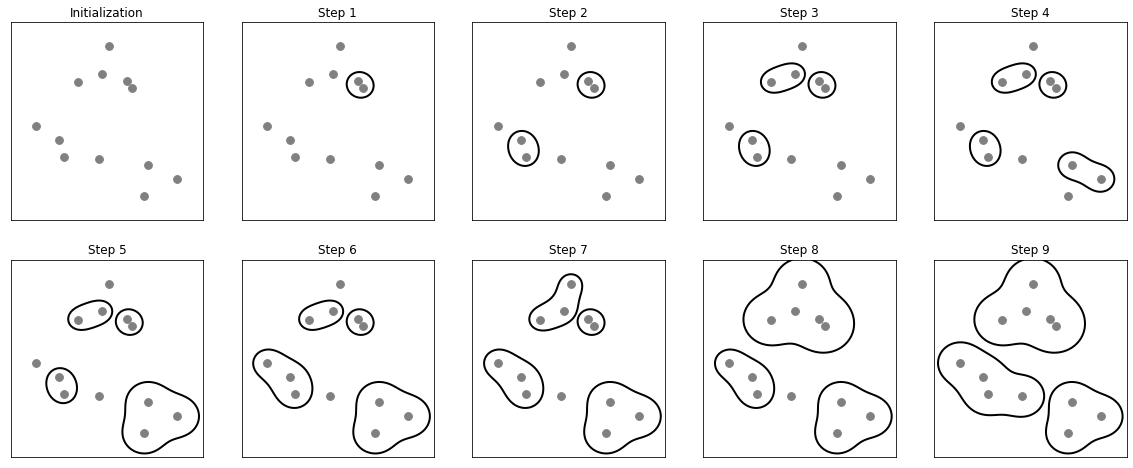

In [61]:
mglearn.plots.plot_agglomerative_algorithm()

*Agglomerative clustering iteratively joins the two closest clusters*

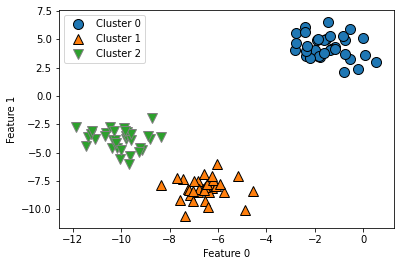

In [62]:
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'], loc='best')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

*Cluster assignments using agglomerative clustering with three clusters*

**Hierarchical Clustering and Dendrograms**

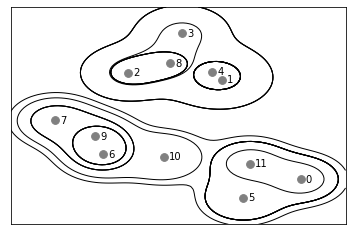

In [63]:
mglearn.plots.plot_agglomerative()

*Hierarchical cluster assignment (shown as lines) generated with agglomerative clustering, with numbered data points*

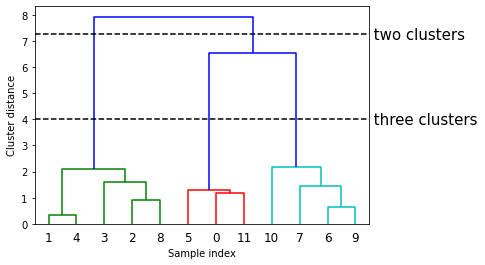

In [64]:
X, y = make_blobs(random_state=0, n_samples=12)

# apply the ward clustering to the data array X
# the SciPy ward function returns an array that specifies the distances bridged when performing agglomerative clustering
linkage_array = ward(X)

# now we plot the dendrogram for the linkage_array containing the distances between clusters
dendrogram(linkage_array)

# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

*Dendrogram of the clustering shown in the previous figure with lines indicating splits into two and three classes*

Unfortunately, agglomerative clustering still fails at separating complex shapes like the `two_moons` dataset. But the same is not true for DBSCAN.

**Density-Based Spatial Clustering of Applications with Noise (DBSCAN)**

* Advantage is that the user does not need to set the number of clusters a priori, it can capture clusters of complex shapes, and it can identify points that are not part of any cluster.

* Slower than agglomerative and K-Means clustering but still scales well to relatively large datasets.

* Works by identifying points that are in crowded regions of the feature space, where many data points are close together. These regions are referred to as dense regions.

* Intuition: Clusters form dense regions of data, separated by regions that are relatively empty.

* Points within a dense region are called *core samples (or core points)*

* Algorithm:

    1. An arbitrary point $p$ in the feature space is selected.
    2. Find all points with distance `eps` or less from $p$.
    3. If there are less than `min_samples` points within a distance of `eps` of the starting point, the point $p$ is labeled as noise, meaning that it doesn't belong to any cluster.
    4. If there are more than `min_samples` points within a distance of `eps` of the starting point, the point $p$ is labeled a core sample and assigned a new cluster label.
    5. All neighbours (within `eps`) of the point are visited.
    6. If they have not been assigned a cluster, they are assigned the new cluster label.
    7. If they are core samples, their neighbours are visited in turn, and so on.
    8. The cluster grows until there are no more core samples within distance `eps` of the cluster.
    9. Another point that hasn't yet been visited is picked, and the same procedure is repeated.

* Three points are specified from this algorithm:
    1. Core points
    2. Boundary points (points within `eps` distance of core points)
    3. Noise

In [65]:
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print('Cluster memberships:\n{}'.format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


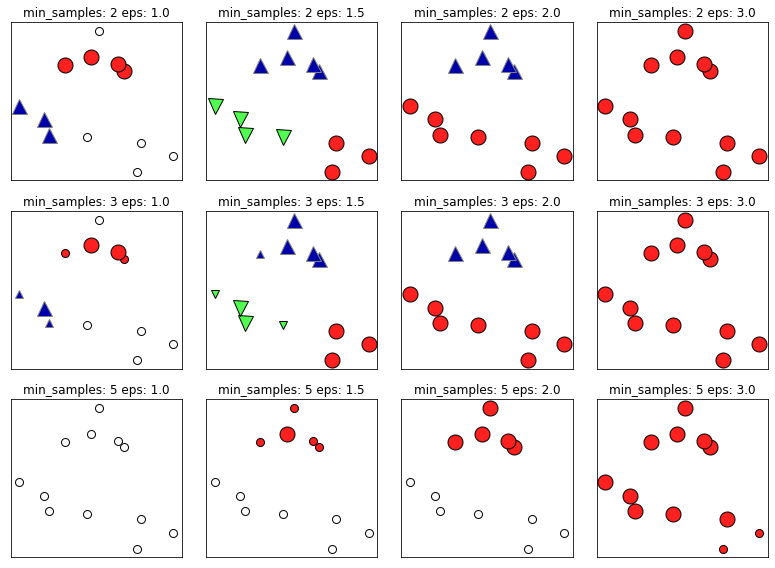

In [66]:
mglearn.plots.plot_dbscan()

*Cluster assignments found by DBSCAN with varying settings for the `min_samples` and `eps` parameters*

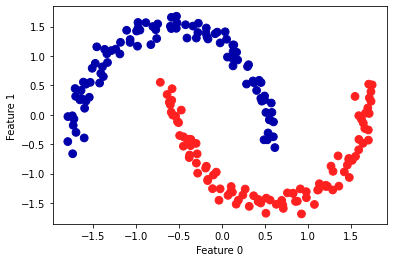

In [67]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1');

*Cluster asssignment found by DBSCAN using the default value of `eps=0.5`*

### 3.5.4 Comparing and Evaluating Clustering Algorithms

**Evaluating Clustering with Ground Truth**

* *Adjusted Rand Index (ARI)*
* *Normalised Mutual Information (NMI)*

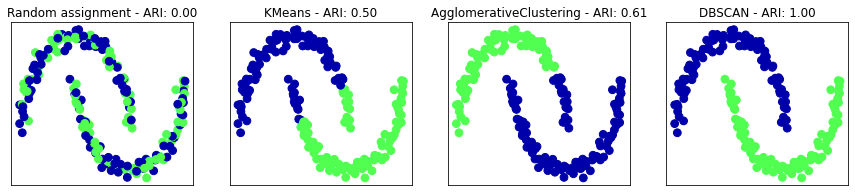

In [68]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title('Random assignment - ARI: {:.2f}'.format(
    adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title('{} - ARI: {:.2f}'.format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

*Comparing random assignment, K-Means, agglomerative clustering, and DBSCAN on the `two_moons` dataset using supervised ARI score*

* A common mistake when evaluating clustering is to use `accuracy_score` instead of `adjusted_rand_score`, `normalized_mutual_info_score`, or some other clustering metric. The problem in using accuracy is that it requires the assigned cluster labels to exactly match the ground truth. However, the cluster labels themeselves are meaningless - the only thing that matters is which points are in the same cluster

In [69]:
# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

# accuracy is zero, as none of the labels are the same
print('Accuracy: {:.2f}'.format(accuracy_score(clusters1, clusters2)))

# adjusted random score is 1, as the clustering is exactly the same
print('ARI: {:.2f}'.format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


**Evaluating Clustering without Ground Truth**

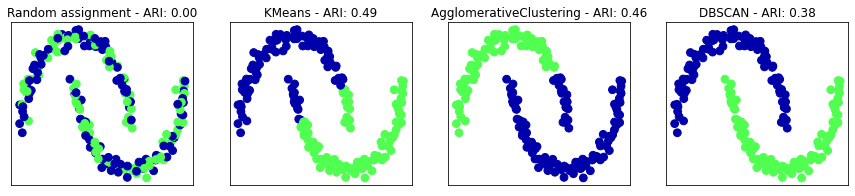

In [70]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})

# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title('Random assignment - ARI: {:.2f}'.format(
    adjusted_rand_score(y, random_clusters)))

# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title('{} - ARI: {:.2f}'.format(algorithm.__class__.__name__,
                                           silhouette_score(X_scaled, clusters)))

*Comparing random assignment, K-Means, Agglomerative Clustering, and DBSCAN on the `two_moons` dataset using the unsupervised silhouette score - the more intuitive result of DBSCAN has a lower silhouette score than the assignments found by K-Means*

**Comparing Algorithms on the Faces Dataset**

In [71]:
#extract eigenfaces from lfa data and transform data
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

In [72]:
# apply DBSCAN with default parameters
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print('Unique labels:  {}'.format(np.unique(labels)))

Unique labels:  [-1]


In [73]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print('Unique labels:  {}'.format(np.unique(labels)))

Unique labels:  [-1]


In [74]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print('Unique labels:  {}'.format(np.unique(labels)))

Unique labels:  [-1  0]


In [75]:
# count number of points in all clusters and noise.
# bincount doesn't allow negative numbers, so we need to add 1.
# the first number in the result corresponds to noise points.
print('Number of points per cluster: {}'.format(np.bincount(labels + 1)))

Number of points per cluster: [  32 2031]


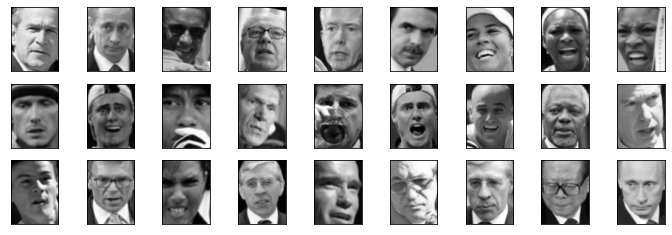

In [76]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))

for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

*Samples from the `faces` dataset labeled as noise by DBSCAN*

In [77]:
for eps in list(range(1, 15, 2)):
    print('\neps={}'.format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print('Number of clusters: {}'.format(len(np.unique(labels))))
    print('Cluster sizes: {}'.format(np.bincount(labels + 1)))


eps=1
Number of clusters: 1
Cluster sizes: [2063]

eps=3
Number of clusters: 1
Cluster sizes: [2063]

eps=5
Number of clusters: 1
Cluster sizes: [2063]

eps=7
Number of clusters: 14
Cluster sizes: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps=9
Number of clusters: 4
Cluster sizes: [1307  750    3    3]

eps=11
Number of clusters: 2
Cluster sizes: [ 413 1650]

eps=13
Number of clusters: 2
Cluster sizes: [ 120 1943]


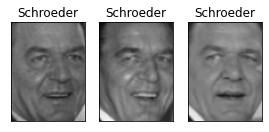

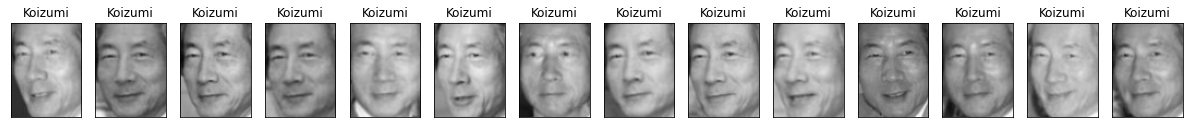

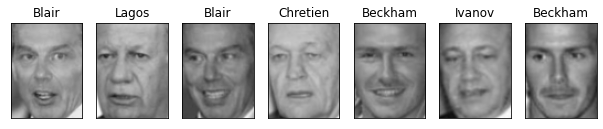

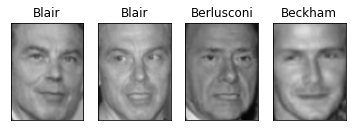

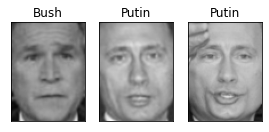

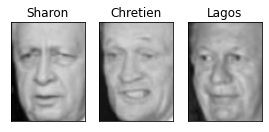

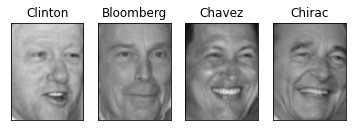

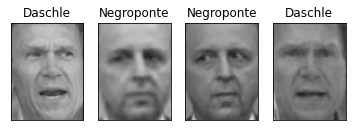

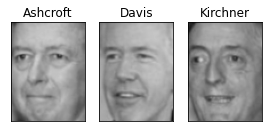

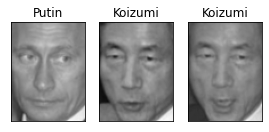

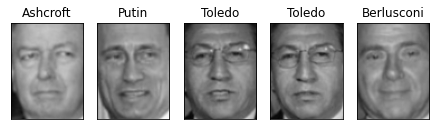

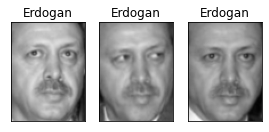

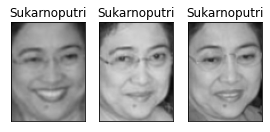

In [78]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

*Clusters found by DBSCAN with `eps=7`*

**Analysing the `faces` Dataset with K-Means**

In [79]:
# extract clusters with k-means
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print('Cluster sizes k-means: {}'.format(np.bincount(labels_km)))

Cluster sizes k-means: [155 175 238  75 358 257  91 219 323 172]


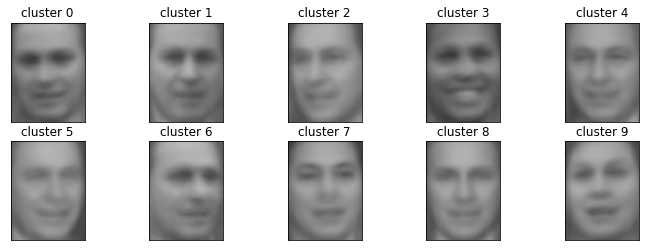

In [80]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))

for i, (center, ax) in enumerate(zip(km.cluster_centers_, axes.ravel())):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
              vmin=0, vmax=1)
    ax.set_title('cluster {}'.format(i))

*Cluster centers found by K-Means when setting the number of clusters to 10.*

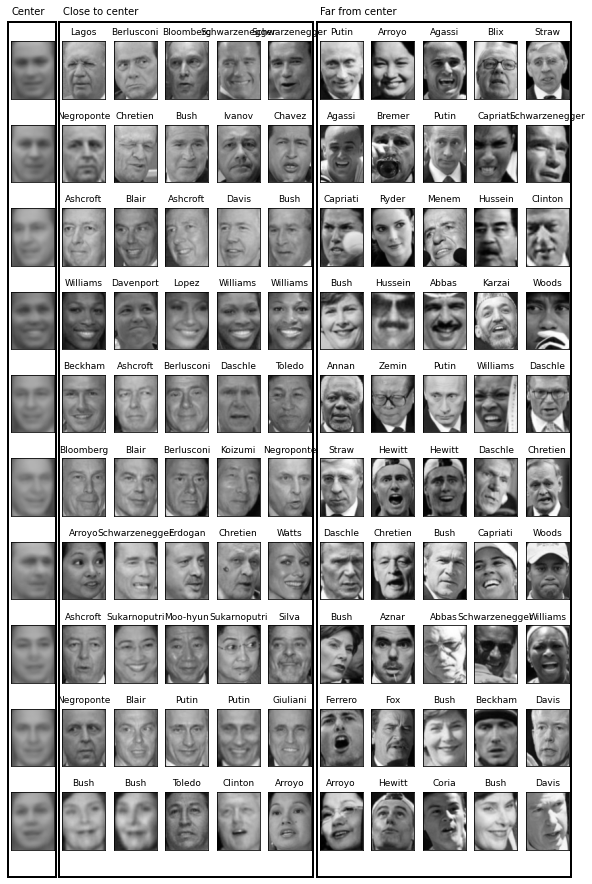

In [81]:
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people,
                                y_people, people.target_names)

*Sample images for each cluster found by k-means - the cluster centers are on the left, followed by the five closest points to each center and the five points that are assigned to the cluster but are furthest away from the center*

**Analysing the `faces` Dataset with agglomerative clustering**

In [82]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print('Cluster sizes agglomerative clustering: {}'.format(
    np.bincount(labels_agg)
))

Cluster sizes agglomerative clustering: [169 660 144 329 217  85  18 261  31 149]


In [83]:
print('ARI: {:.2f}'.format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.09


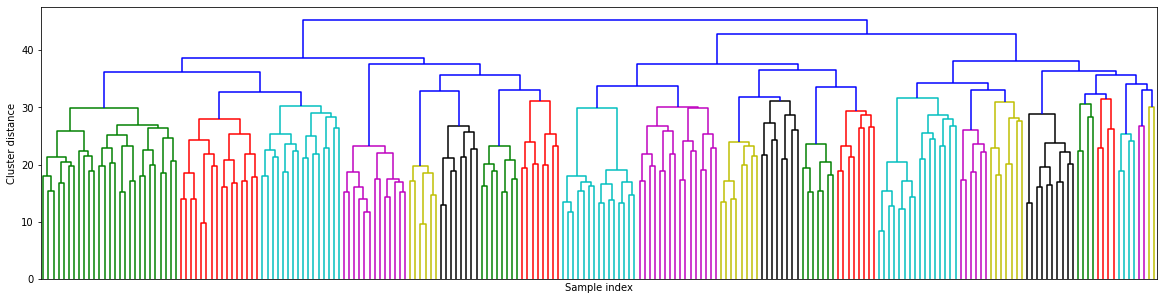

In [84]:
linkage_array = ward(X_pca)

# now we plot the dendrogram for the linkage_array containing the distances between clusters
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

*Dendrogram  of agglomerative clustering on the `faces` dataset*

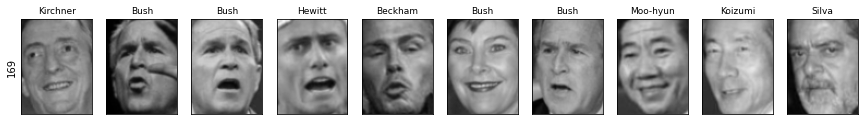

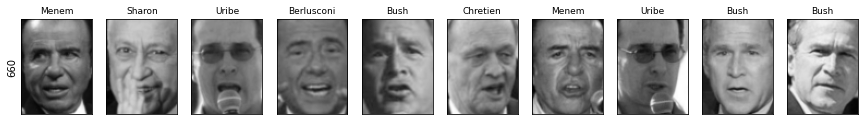

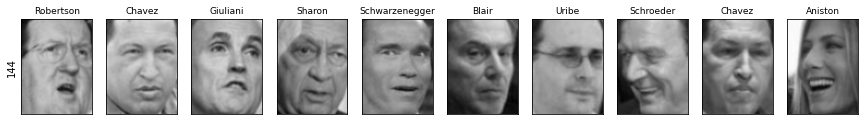

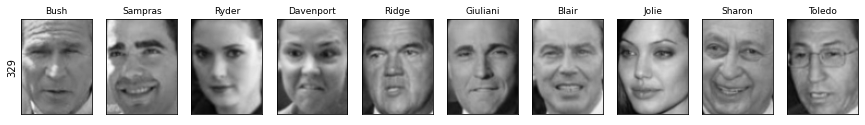

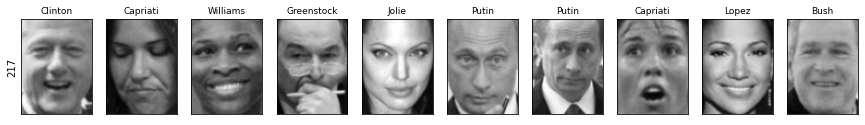

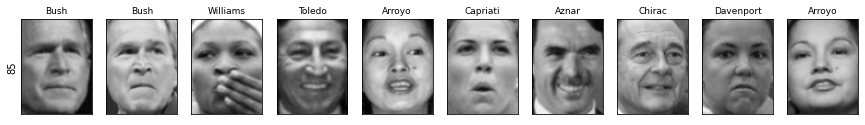

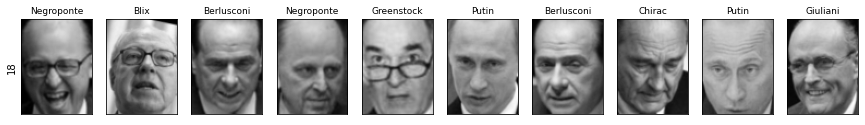

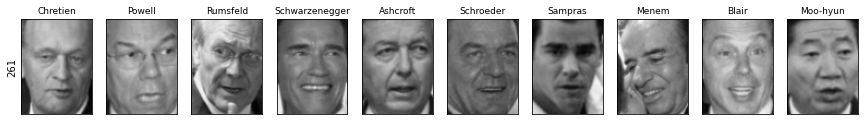

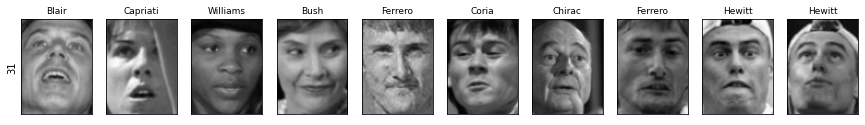

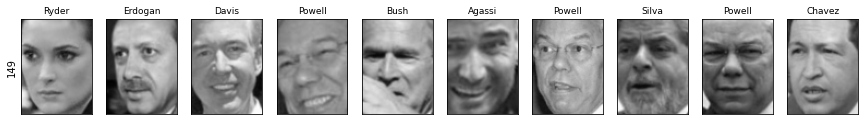

In [85]:
n_clusters = 10

for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})

*Random images from the clusters generated. Each row corresponds to one cluster; the number to the left lists the number of images in each cluster*

Cluster sizes agglomerative clustering: [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


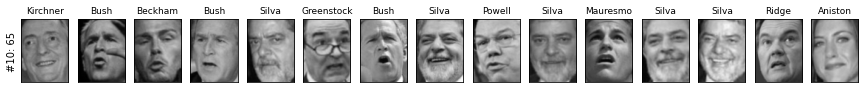

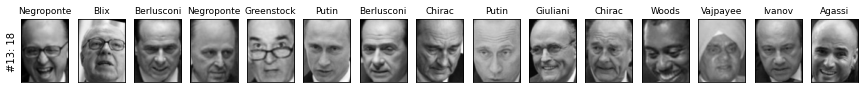

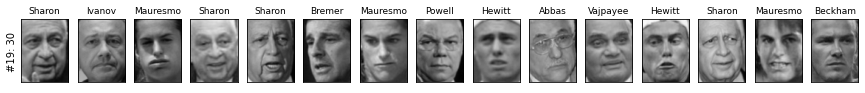

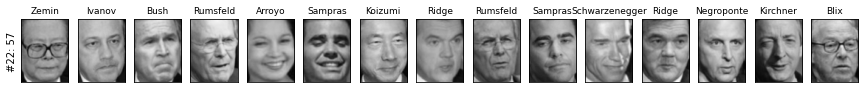

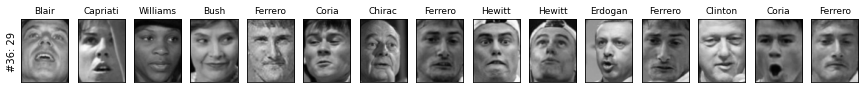

In [86]:
# extract clusters with ward agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print('Cluster sizes agglomerative clustering: {}'.format(np.bincount(labels_agg)))

n_clusters = 40

for cluster in [10, 13, 19, 22, 36]: # hand-picked "interesting" clusters
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel('#{}: {}'.format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)

*Images from selected clusters found by agglomerative clustering when settting the number of clusters to 40 - the text to the left shows the index of the cluster and the total number of points in the cluster*

### 3.5.5 Summary of Clustering Methods

* Most helpful during the exploratory phase of data analysis.
* Clustering algorithms:
    1. k-means
    2. DBSCAN
    3. Agglomerative
* All three of these algorithms can control the granularity of clustering.
* k-means and agglomerative clustering allow you to specify the number of desired clusters.
* DBSCAN allows you to define proximity with `eps`.

---

* **\+** Can be used on large datasets
* **\+** Easy to understand
* **\+** Allow for clustering into many clusters
* **\+** K-Means: Allows for a characterisation of the clusters using the cluster means. Can be viewed as a decomposition method, where each data point is represented by its cluster center.
* **\+** DBSCAN: Allows for detection of "noise points" that are not assigned any cluster, and it can help automatically determine the number of clusters. It allows for complex cluster shapes. Produces clusters of very different size, which can be a strength or a weakness.
* **\+** Agglomerative: Provide a whole hierarchy of possible partitions of data, which can be easily inspected via dendrograms.

|           estimator.fit(X_train, [y_train])       | |
|-------------------------|---------------------------|
|`estimator.predict(X_test)`|`estimator.transform(X_test)`|
|  Classification         |  Preprocessing            |
|  Regression             |  Dimensionality Reduction |
|  Clustering             |  Feature Extraction       |
|                         |  Feacture Selection       |